In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
# Columns for the wildfire dataset, dependent (the class that will be predicted) and indepenent 
independent_columns = [
    "year", 
    "temp",
    "humidity",
    "rainfall",
    "drought_code",
    "buildup_index",
    "day",
    "month",
    "wind_speed"
]
dependent_column = "fire"

# Read the training csv file into the training_data variable
training_data = pd.read_csv("wildfires_training.csv")
# Index a portion of the dataframe (independent variables) and their values (fire variable is excluded from this list)
x_axis_training = training_data.loc[:,independent_columns]
# Index a portion of the dataframe (dependent variable) and its values (fire variable only)
y_axis_training = training_data.loc[:,dependent_column]

# Read the test csv file into the test_data variable
test_data = pd.read_csv("wildfires_test.csv")
# Index a portion of the dataframe (independent variables) and their values (fire variable is excluded from this list)
x_axis_test = test_data.loc[:,independent_columns]
# Index a portion of the dataframe (dependent variable) and its values (fire variable only)
y_axis_test = test_data.loc[:,dependent_column]

Training data accuracy default hyperparameters:  0.512987012987013
Test data accuracy default hyperparameters:  0.56


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


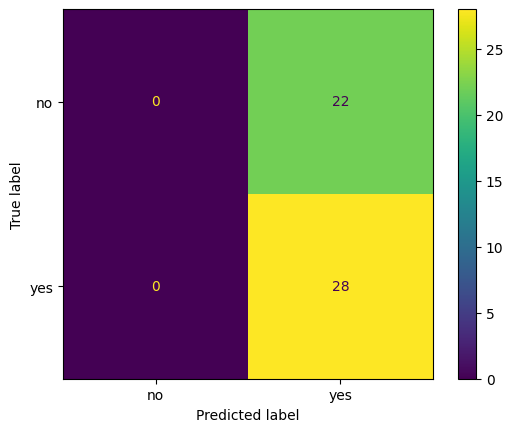

In [2]:
support_vector_model = SVC()  # Change the hyperparameters to tweak the behaviour of the machine learning model  
# Supply the support_vector_model with the training data 
support_vector_model.fit(x_axis_training, y_axis_training)

# Calculate the predictions for the training dataset and the test dataset
training_data_prediction_default = support_vector_model.predict(x_axis_training)
test_data_prediction_default = support_vector_model.predict(x_axis_test)
    
# Compute the prediction accuracy of the SVC for the training examples and the unseen examples 
training_data_prediction_accuracy_default = metrics.accuracy_score(y_axis_training, training_data_prediction_default)
test_data_prediction_accuracy_default = metrics.accuracy_score(y_axis_test, test_data_prediction_default)

# Default training and test data prediction accuracy 
print("Training data accuracy default hyperparameters: ", training_data_prediction_accuracy_default)
print("Test data accuracy default hyperparameters: ",test_data_prediction_accuracy_default)       
# Display corresponding confusion matrix with default settings of the SVC algorithm for test data
conf_matrix = plot_confusion_matrix(support_vector_model, x_axis_test, y_axis_test)
plt.show()

Training data accuracy hyperparameters, kernel:  linear 0.9155844155844156
Test data accuracy default hyperparameters kernel:  linear 0.88


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


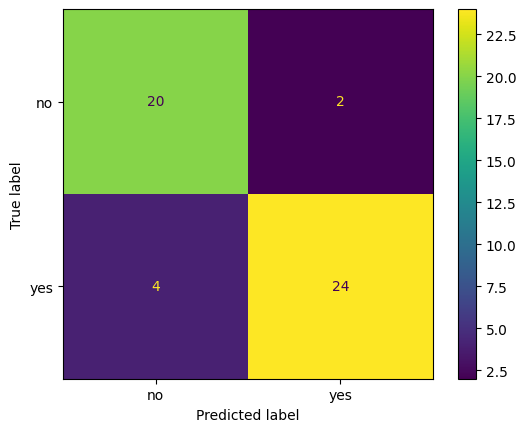

Training data accuracy hyperparameters, kernel:  poly 0.512987012987013
Test data accuracy default hyperparameters kernel:  poly 0.56


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


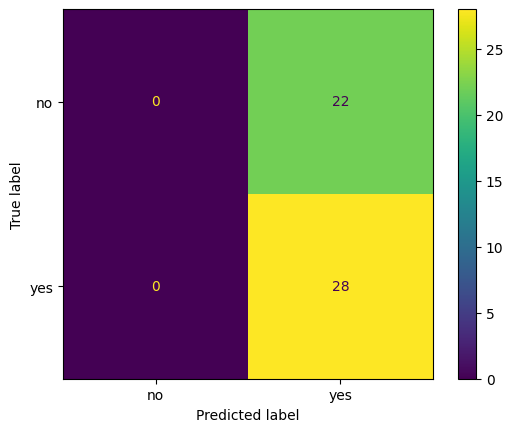

C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Training data accuracy hyperparameters, kernel:  rbf 0.512987012987013
Test data accuracy default hyperparameters kernel:  rbf 0.56


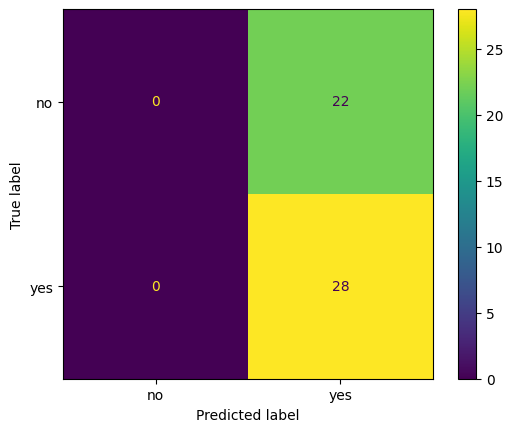

C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Training data accuracy hyperparameters, kernel:  sigmoid 0.512987012987013
Test data accuracy default hyperparameters kernel:  sigmoid 0.56


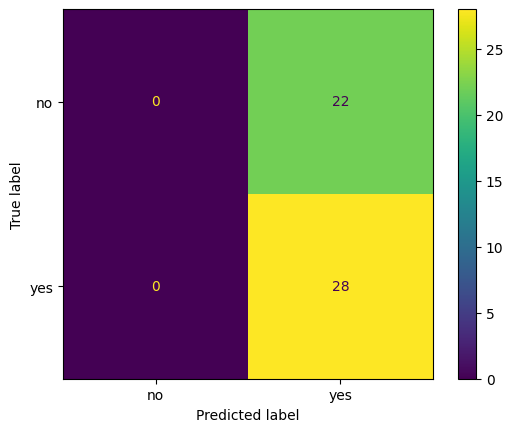

In [3]:
# Set up a list of different kernels, this will be used within a loop to test out the effects that different kernels have on prediction accuracy 
kernels = ["linear", "poly", "rbf", "sigmoid"]
for j in range(len(kernels)):
    support_vector_model = SVC(kernel=kernels[j])  # Change the hyperparameters to tweak the behaviour of the machine learning model  
    # Supply the support_vector_model with the training data 
    support_vector_model.fit(x_axis_training, y_axis_training)

    # Calculate the predictions for the training dataset and the test dataset
    training_data_prediction_default = support_vector_model.predict(x_axis_training)
    test_data_prediction_default = support_vector_model.predict(x_axis_test)
    
    # Compute the prediction accuracy of the SVC for the training examples and the unseen examples 
    training_data_prediction_accuracy_default = metrics.accuracy_score(y_axis_training, training_data_prediction_default)
    test_data_prediction_accuracy_default = metrics.accuracy_score(y_axis_test, test_data_prediction_default)

    # Default training and test data prediction accuracy 
    print("Training data accuracy hyperparameters, kernel: ",kernels[j] , training_data_prediction_accuracy_default)
    print("Test data accuracy default hyperparameters kernel: ",kernels[j] ,test_data_prediction_accuracy_default)       
    # Display corresponding confusion matrix with default settings of the SVC algorithm for test data
    conf_matrix = plot_confusion_matrix(support_vector_model, x_axis_test, y_axis_test)
    plt.show()

In [4]:
# Different kernels that the SVM algorithm can run on
kernels = ["linear", "poly", "rbf", "sigmoid"]
# C-Values in range 0 -> 1000 in steps of 100
c_values = list(range(0,1100,100))
support_vector_models = []
training_data_prediction_accuracy = [] 
test_data_prediction_accuracy = []
# Set first cell of c_value list to be 1
c_values[0] = 1;

for j in range(len(kernels)):
    training_data_prediction_accuracy.append([])
    test_data_prediction_accuracy.append([])
    support_vector_models.append([])
    for k in range(len(c_values)):
        support_vector_model = SVC(kernel=kernels[j], C=c_values[k])  # Change the hyperparameters to tweak the behaviour of the machine learning model  
        # Supply the support_vector_model with the training data 
        support_vector_model.fit(x_axis_training, y_axis_training)

        # Calculate the predictions for the training dataset and the test dataset
        training_data_prediction = support_vector_model.predict(x_axis_training)
        test_data_prediction = support_vector_model.predict(x_axis_test)
    
        # Compute the prediction accuracy of the SVC for the training examples and the unseen examples 
        training_data_prediction_accuracy[j].append(metrics.accuracy_score(y_axis_training, training_data_prediction))
        test_data_prediction_accuracy[j].append(metrics.accuracy_score(y_axis_test, test_data_prediction))
        # Append the support vector model to the list (used later for plotting confusion matrices)
        support_vector_models[j].append(support_vector_model)    
    print("kernel: ", kernels[j], "\ntraining accuracy for C-values 1 -> 1000 in steps of 100: ", training_data_prediction_accuracy[j]) 
    print("kernel: ", kernels[j], "\ntest accuracy for C-values 1 -> 1000 in steps of 100: ", test_data_prediction_accuracy[j],"\n" )   

kernel:  linear 
training accuracy for C-values 1 -> 1000 in steps of 100:  [0.9155844155844156, 0.935064935064935, 0.8831168831168831, 0.8831168831168831, 0.9090909090909091, 0.9090909090909091, 0.8831168831168831, 0.8831168831168831, 0.8831168831168831, 0.8831168831168831, 0.8831168831168831]
kernel:  linear 
test accuracy for C-values 1 -> 1000 in steps of 100:  [0.88, 0.82, 0.88, 0.88, 0.82, 0.82, 0.88, 0.88, 0.88, 0.88, 0.88] 

kernel:  poly 
training accuracy for C-values 1 -> 1000 in steps of 100:  [0.512987012987013, 0.8636363636363636, 0.8766233766233766, 0.8831168831168831, 0.8766233766233766, 0.8766233766233766, 0.8766233766233766, 0.8831168831168831, 0.8831168831168831, 0.8831168831168831, 0.8831168831168831]
kernel:  poly 
test accuracy for C-values 1 -> 1000 in steps of 100:  [0.56, 0.78, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.82] 

kernel:  rbf 
training accuracy for C-values 1 -> 1000 in steps of 100:  [0.512987012987013, 0.8701298701298701, 0.8636363636363636, 0.863

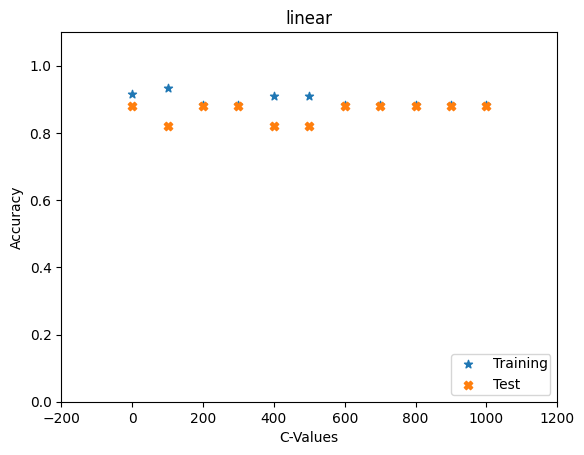

Highest prediction accuracy for training dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


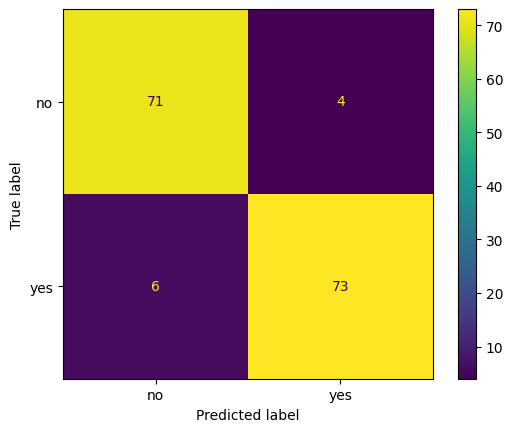

Highest prediction accuracy for test dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


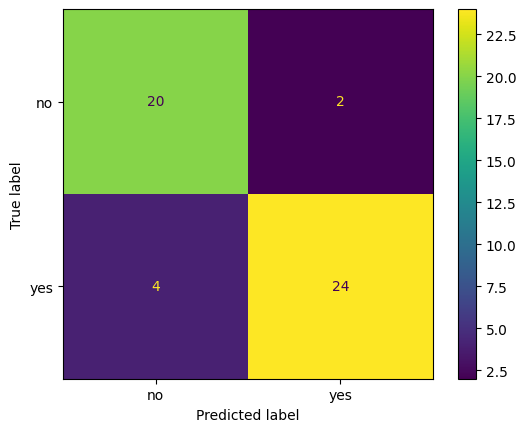

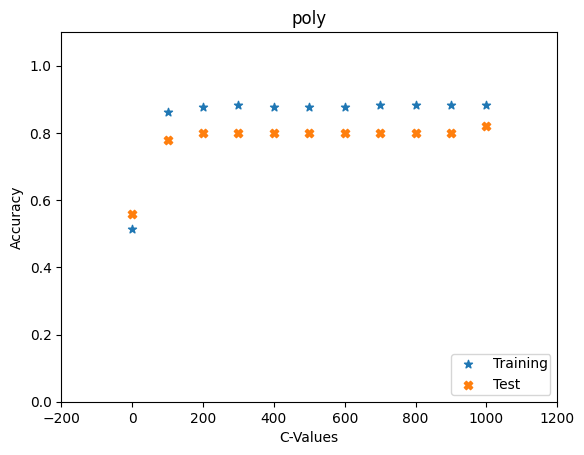

Highest prediction accuracy for training dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


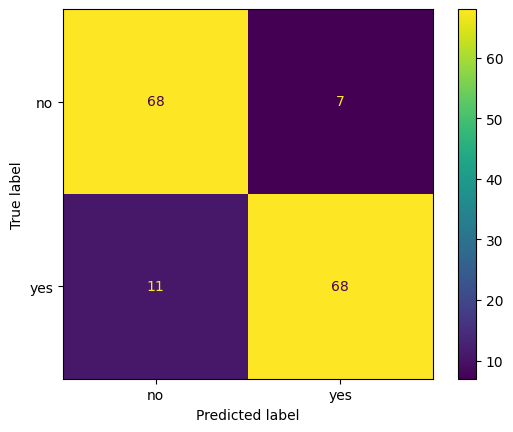

Highest prediction accuracy for test dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


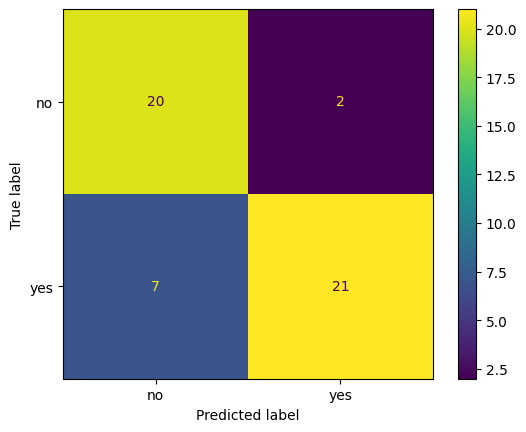

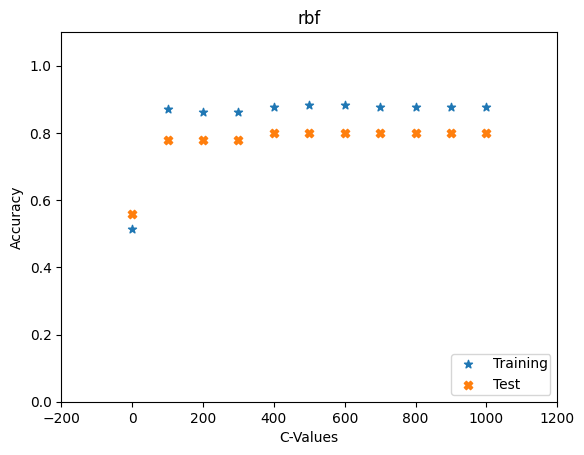

Highest prediction accuracy for training dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


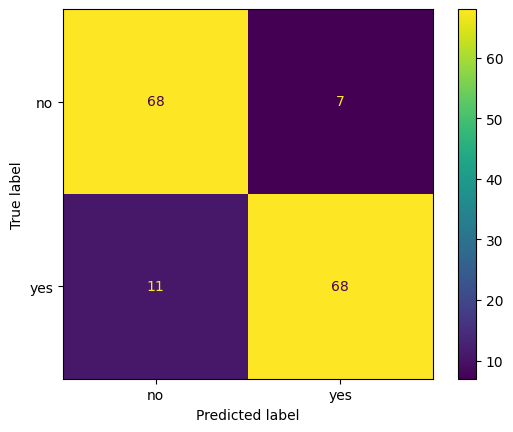

Highest prediction accuracy for test dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


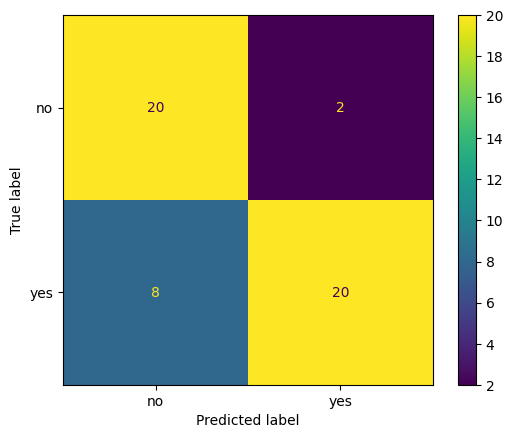

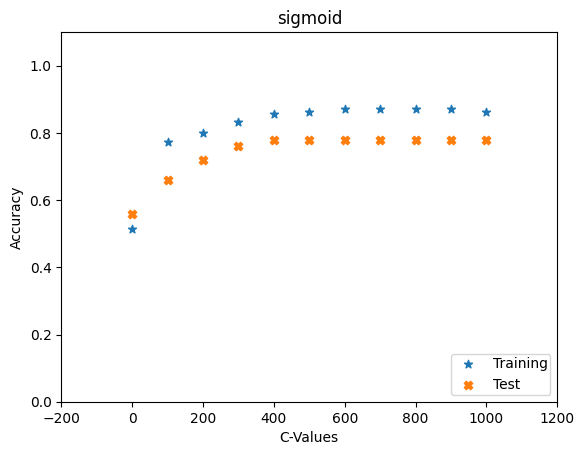

Highest prediction accuracy for training dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


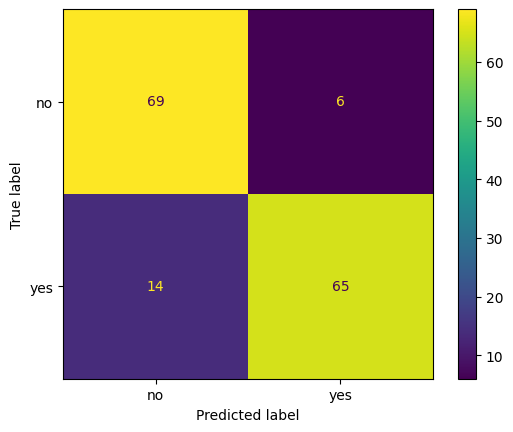

Highest prediction accuracy for test dataset


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


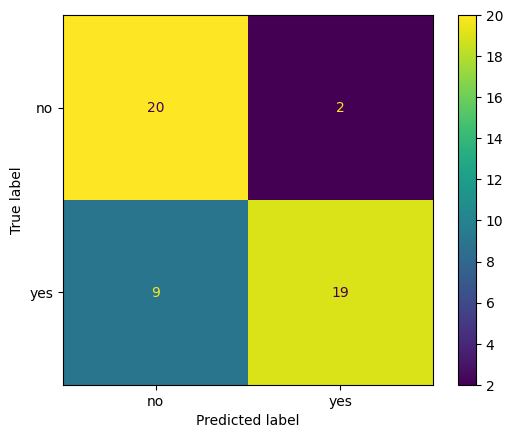

In [5]:
# Training accuracy and test accuracy (Kernel and C-value hyperparameters have the same values) in range 1 => 1000 steps of 100
index = 0;
for i in range(len(kernels)):
    # Define the prediction accuracies of the model for training and test datasets on the scatter plot
    plt.scatter(c_values,training_data_prediction_accuracy[i],marker="*")
    plt.scatter(c_values,test_data_prediction_accuracy[i],marker="X")
    # Set the limits of X and Y axis on the plot
    plt.xlim([-200, max(c_values)+200])
    plt.ylim([0.0, 1.1])
    # Set plot title (kernel)
    plt.title(kernels[i])
    # Set the labels for the plot
    plt.xlabel("C-Values")
    plt.ylabel("Accuracy")
    # Set the labels for predicted accuracies
    legend_labels = ["Training","Test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.show()
    
    #find the most accurate model for the training dataset from the 1 - 10 possible max_feature settings for this iteration of max_depth 
    np_array = np.array(training_data_prediction_accuracy[i])
    max_index = np.unravel_index(np_array.argmax(), np_array.shape)
    
    # Plot the confusion matrix for the SVC model 
    print("Highest prediction accuracy for training dataset")
    conf_matrix = plot_confusion_matrix(support_vector_models[i][max_index[0]], x_axis_training, y_axis_training)
    plt.show()
    
    
    #find the most accurate model for the test dataset from the 1 - 10 possible max_feature settings for this iteration of max_depth 
    np_array = np.array(test_data_prediction_accuracy[i])
    max_index = np.unravel_index(np_array.argmax(), np_array.shape)
    
    # Plot the confusion matrix for the SVC model
    print("Highest prediction accuracy for test dataset")
    conf_matrix = plot_confusion_matrix(support_vector_models[i][max_index[0]], x_axis_test, y_axis_test)
    plt.show()
    

C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Max training set accuracy: 0.935064935064935
Index of max training set accuracy: (0, 1)
Hyperparameter values: kernel = linear c-value = 100
Best prediction accuracy for test dataset:  0.935064935064935


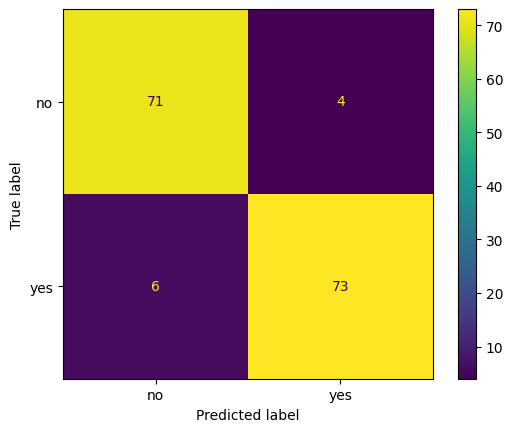

Max test set accuracy: 0.88
Index of max test set accuracy: (0, 0)
Hyperparameter values: kernel = linear c-value = 1
Best prediction accuracy for test dataset:  0.88


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


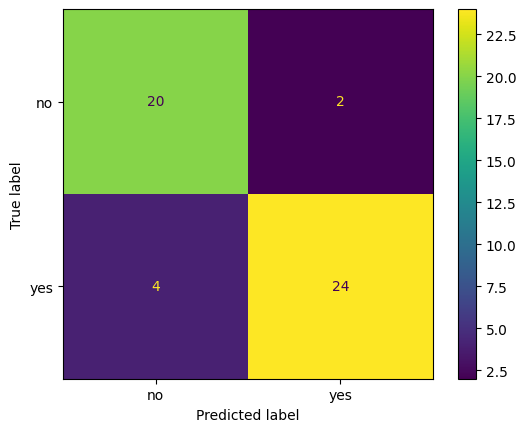

In [6]:
# Find the indices of the model for training dataset with the highest accuracy score
np_array = np.array(training_data_prediction_accuracy)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max training set accuracy:",np_array.max())
print("Index of max training set accuracy:",max_index)
print("Hyperparameter values: kernel =",kernels[max_index[0]],"c-value =",c_values[max_index[1]]) 
print("Best prediction accuracy for test dataset: ", np.max(np_array))
indexes = np.array(max_index)
# plot the confusion matrix of the most accurate model
conf_matrix = plot_confusion_matrix(support_vector_models[indexes[0]][indexes[1]], x_axis_training, y_axis_training)
plt.show()



# Find the indices of the model with the highest accuracy score
np_array = np.array(test_data_prediction_accuracy)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max test set accuracy:",np_array.max())
print("Index of max test set accuracy:",max_index)
print("Hyperparameter values: kernel =",kernels[max_index[0]],"c-value =",c_values[max_index[1]]) 
print("Best prediction accuracy for test dataset: ", np.max(np_array))
indexes = np.array(max_index)
# plot the confusion matrix of the most accurate model
conf_matrix = plot_confusion_matrix(support_vector_models[indexes[0]][indexes[1]], x_axis_test, y_axis_test)
plt.show()